In [3]:
!pip install pydotplus
#!pip install mlrose

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     -- ----------------------------------- 20.5/278.7 kB 65.2 kB/s eta 0:00:04
     -- ----------------------------------- 20.5/278.7 kB 65.2 kB/s eta 0:00:04
     -- ----------------------------------- 20.5/278.7 kB 65.2 kB/s eta 0:00:04
     -- ----------------------------------- 20.5/278.7 kB 65.2 kB/s eta 0:00:04
     ---- --------------------------------- 30.7/278.7 kB 59.5 kB/s eta 0:00:05
     ----- -------------------------------- 41.0/278.7 kB 78.6 kB/s eta 0:00:04
     -------- ---------------------------- 61.4/278.7 kB 113.0 kB/s eta 0:00:02
     --------- --------------------------- 71.7/278.7 kB 122.9 kB/s eta

In [88]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

ModuleNotFoundError: No module named 'mlrose'

In [86]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [87]:
sys.modules['sklearn.externals.six'] = six

NameError: name 'six' is not defined

In [83]:
#pip install imblearn
pip install six

SyntaxError: invalid syntax (2583683013.py, line 2)

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid", palette = ("tab10"))
import warnings;warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import os
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [42]:
df=pd.read_csv('drug200.csv', delimiter=",")

In [43]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [45]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [46]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [47]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [48]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [49]:
df.sample()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
193,72,M,LOW,HIGH,6.769,drugC


In [50]:
data_size=df.size

In [51]:
data_size
print("Size of Data is : ",data_size)

Size of Data is :  1200


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

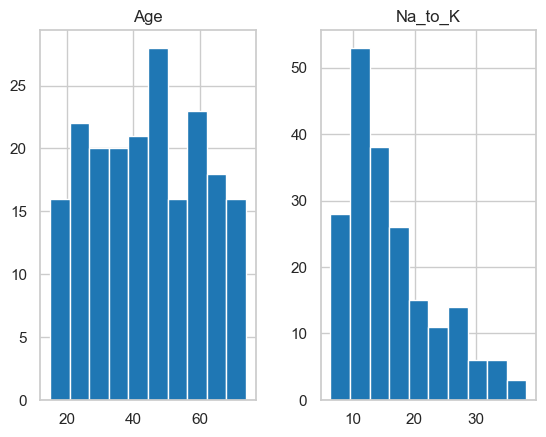

In [52]:
df.hist()

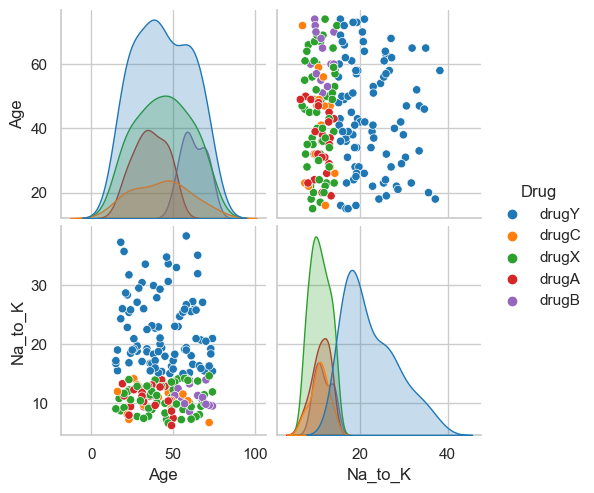

In [53]:
sns.pairplot(data=df,hue='Drug')

In [54]:
print(f"Unique values in sex column: {df['Sex'].unique()}")
print(f"Unique values in bp column: {df['BP'].unique()}")
print(f"Unique values in cholesterol column: {df['Cholesterol'].unique()}")

Unique values in sex column: ['F' 'M']
Unique values in bp column: ['HIGH' 'LOW' 'NORMAL']
Unique values in cholesterol column: ['HIGH' 'NORMAL']


In [55]:
lb = LabelEncoder()
cols = ['Sex','BP','Cholesterol']
for col in cols:
    df[col] = lb.fit_transform(df[col].values)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [78]:
df['Sex'] = df['Sex'].astype('category')


AttributeError: 'int' object has no attribute 'startswith'

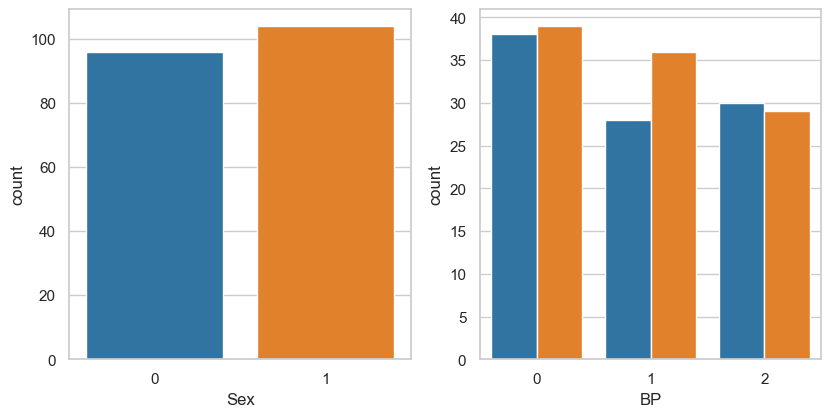

In [79]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.countplot(data = df, x ='Sex')
plt.subplot(2,3,2)
sns.countplot(data = df, x ='BP',hue = 'Sex')
plt.subplot(2,3,4)
sns.countplot(data = df, x ='Cholesterol',hue = 'Sex')
plt.subplot(2,3,5)
sns.countplot(data = df, x = 'Drug', hue = 'Sex')
plt.show()

In [60]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [61]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [62]:
X=df.drop('Drug',axis=1)
y=df['Drug']

In [63]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=3)

In [65]:
ss = StandardScaler()
ss = ss.fit(X_train)
X_train_trans = ss.transform(X_train)

X_testtrans=ss.transform(X_test)
X_train_trans[:5]

array([[-1.06923935, -1.07417231, -1.05879101,  0.95802308,  0.27945862],
       [-0.14482493, -1.07417231,  1.47506782,  0.95802308,  0.75143149],
       [-0.94598409, -1.07417231,  1.47506782, -1.04381619,  0.34425404],
       [-1.50063275, -1.07417231, -1.05879101, -1.04381619, -0.45774687],
       [ 0.40982373,  0.93094934,  1.47506782,  0.95802308, -0.14549345]])

In [66]:
X_testtrans

array([[ 1.82725918, -1.07417231,  1.47506782, -1.04381619,  0.28702228],
       [ 1.45749341,  0.93094934,  1.47506782,  0.95802308, -0.7621845 ],
       [ 1.58074866, -1.07417231,  1.47506782, -1.04381619, -0.86719342],
       [ 0.53307898,  0.93094934,  1.47506782, -1.04381619, -0.88874988],
       [-0.94598409, -1.07417231,  1.47506782, -1.04381619, -0.5124574 ],
       [-0.69947358, -1.07417231,  0.2081384 , -1.04381619, -0.911693  ],
       [-0.45296307, -1.07417231, -1.05879101,  0.95802308, -0.18331179],
       [-0.39133544, -1.07417231, -1.05879101, -1.04381619, -0.48573244],
       [ 1.64237629,  0.93094934, -1.05879101, -1.04381619, -0.37530289],
       [-0.76110121,  0.93094934, -1.05879101,  0.95802308, -0.63952702],
       [ 1.45749341, -1.07417231,  1.47506782, -1.04381619, -0.13276128],
       [-0.32970781, -1.07417231, -1.05879101,  0.95802308, -0.70823034],
       [-0.94598409, -1.07417231, -1.05879101,  0.95802308,  0.2350851 ],
       [ 0.90284475,  0.93094934, -1.0

In [67]:
y_train.value_counts()

Drug
drugY    69
drugX    33
drugA    16
drugC    11
drugB    11
Name: count, dtype: int64

In [68]:
sm = SMOTE(random_state = 2)
X_train_sm,y_train_sm = sm.fit_resample(X_train_trans, y_train)

In [69]:
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm),grid_search.best_estimator_,grid_search.best_score_

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [3, None], 'max_features': [1, 3, 10],
                          'min_samples_split': [2, 3, 10]}),
 DecisionTreeClassifier(max_features=10),
 1.0)

In [70]:
model = DecisionTreeClassifier(max_features=3, min_samples_split=10).fit(X_train_sm, y_train_sm)

In [71]:
model


DecisionTreeClassifier(max_features=3, min_samples_split=10)

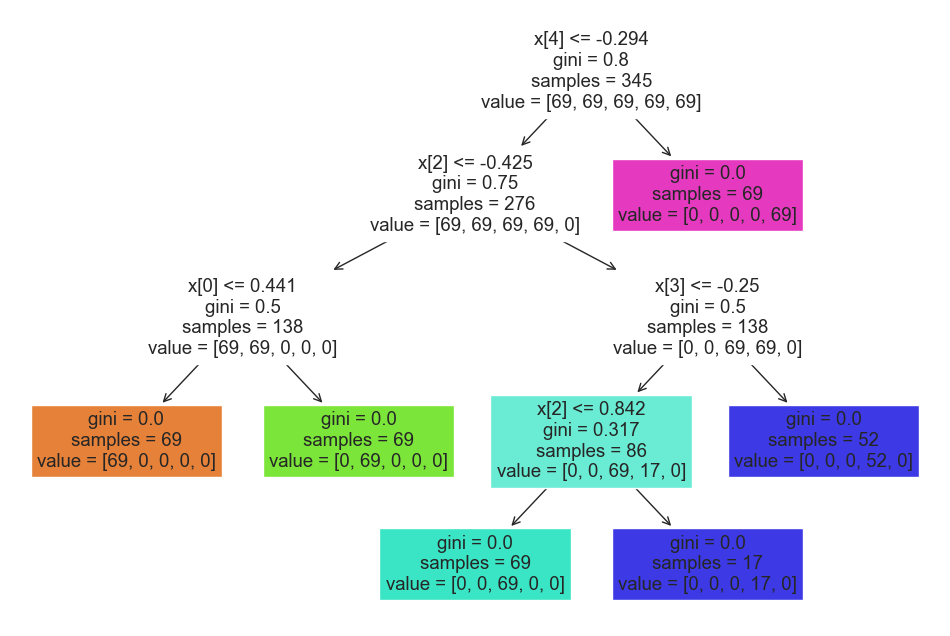

In [72]:
plt.figure(figsize = (12, 8))
plot_tree(model,filled=True)
plt.show()

In [73]:

val_score = cross_val_score(model,X_train_sm,y_train_sm,cv = 5)
print(f'minimum score of model on train data : {val_score.min()}')
print(f'best score of model on train data : {val_score.mean()}')
print(f'maximum score of model on train data : {val_score.max()}')



minimum score of model on train data : 0.9420289855072463
best score of model on train data : 0.9710144927536233
maximum score of model on train data : 0.9855072463768116


In [74]:
ss = StandardScaler()
ss = ss.fit(X_test)
X_test_trans = ss.transform(X_test)

In [75]:
pred = model.predict(X_test_trans)

In [76]:
print(f'model accuracy on unseen data {accuracy_score(y_test,pred)}')

model accuracy on unseen data 0.7833333333333333


In [77]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'StringIO' is not defined